In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from itertools import chain
from rdkit import Chem
from rdkit.Chem import Descriptors, AllChem
from rdkit import DataStructs
import numpy as np

In [4]:
def plot_molecular_weights(metabolite_weights, parent_weights, weights_diff):
    # Plot histograms for metabolite and parent weights side by side
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    axes[1].hist(parent_weights, bins=50, color='lightgreen')
    axes[1].set_title('Drug Weights')
    axes[1].set_xlabel('Molecular Weight (Da)')
    axes[1].set_ylabel('Frequency')

    axes[0].hist(metabolite_weights, bins=50, color='skyblue')
    axes[0].set_title('Metabolite Weights')
    axes[0].set_xlabel('Molecular Weight (Da)')
    axes[0].set_ylabel('Frequency')

    # Make y-axes equal
    histograms = [axes[0], axes[1]]
    max_ylim = max(ax.get_ylim()[1] for ax in histograms)  # Find the maximum y-limit
    for ax in histograms:
        ax.set_ylim(top=max_ylim)

    plt.tight_layout()
    plt.show()

    # Plot histogram for weight differences
    plt.figure(figsize=(6, 5))
    plt.hist(weights_diff, bins=40, color='magenta')
    plt.title('Weight Differences (Parent - Metabolite)')
    plt.xlabel('Weight Difference (Da)')
    plt.ylabel('Frequency')
    plt.show()

def molecular_weight_analysis(dataset): # input dataset needs columns 'parent_smiles' and 'child_smiles'

    metabolite_weights, parent_weights, weights_diff = [], [], []

    parents = dataset["parent_smiles"]
    metabolites = dataset["child_smiles"]

    for parent, metabolite in zip(parents, metabolites):

        metabolite_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(metabolite))
        metabolite_weights.append(metabolite_weight)

        parent_weight = Descriptors.ExactMolWt(Chem.MolFromSmiles(parent))
        parent_weights.append(parent_weight)

        weight_diff = (parent_weight-metabolite_weight)
        weights_diff.append (weight_diff)

    # Call the plotting function
    plot_molecular_weights(metabolite_weights, parent_weights, weights_diff)

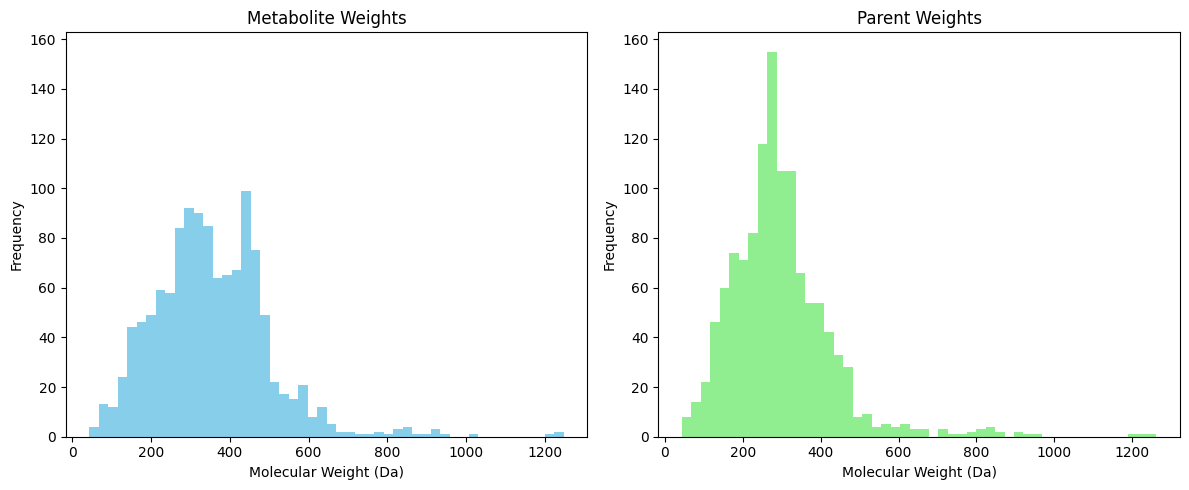

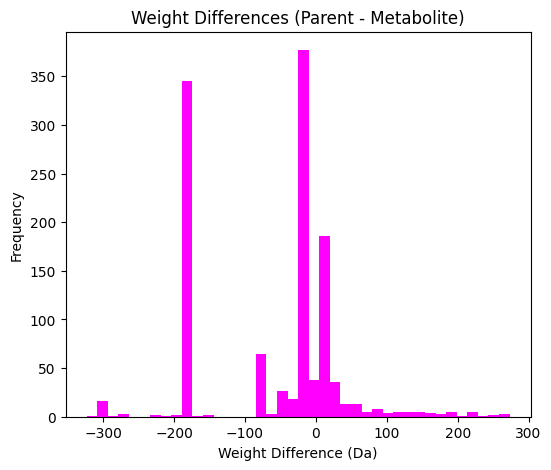

In [ ]:
metxbiodb_clean_unique_parents_df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/preprocessed_metxbiodb/metxbiodb_clean_unique_parents.csv', sep='\t')
molecular_weight_analysis(metxbiodb_clean_unique_parents_df)

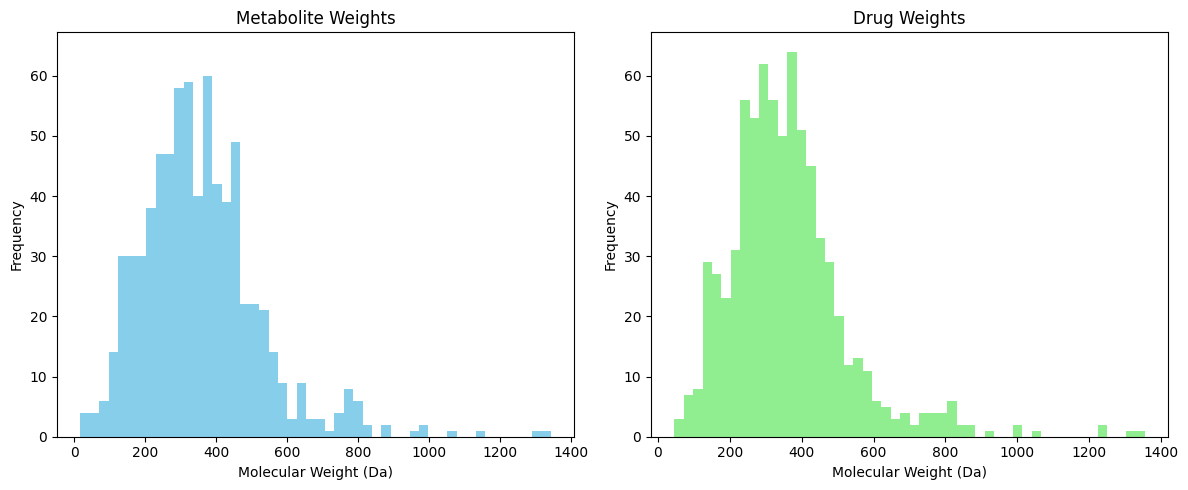

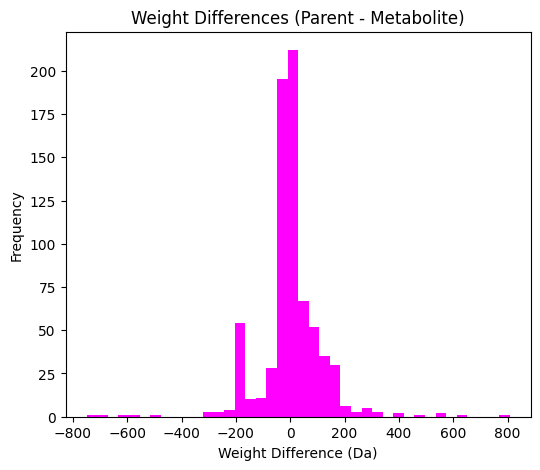

In [7]:
drugbank_clean_unique_parents_df = pd.read_csv('/projects/cc/se_users/carlsson_ksmq649/MasterThesis/dataset/curated_data/drugbank_clean_unique_parents.csv')
molecular_weight_analysis(drugbank_clean_unique_parents_df)